Con el objetivo de buscar potenciales fármacos contra el cáncer dentro de la base de datos ¿Cuál es el mejor agrupamiento de las moléculas disponibilizadas?

1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.
2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?
3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('UML_2024.csv')

In [4]:
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


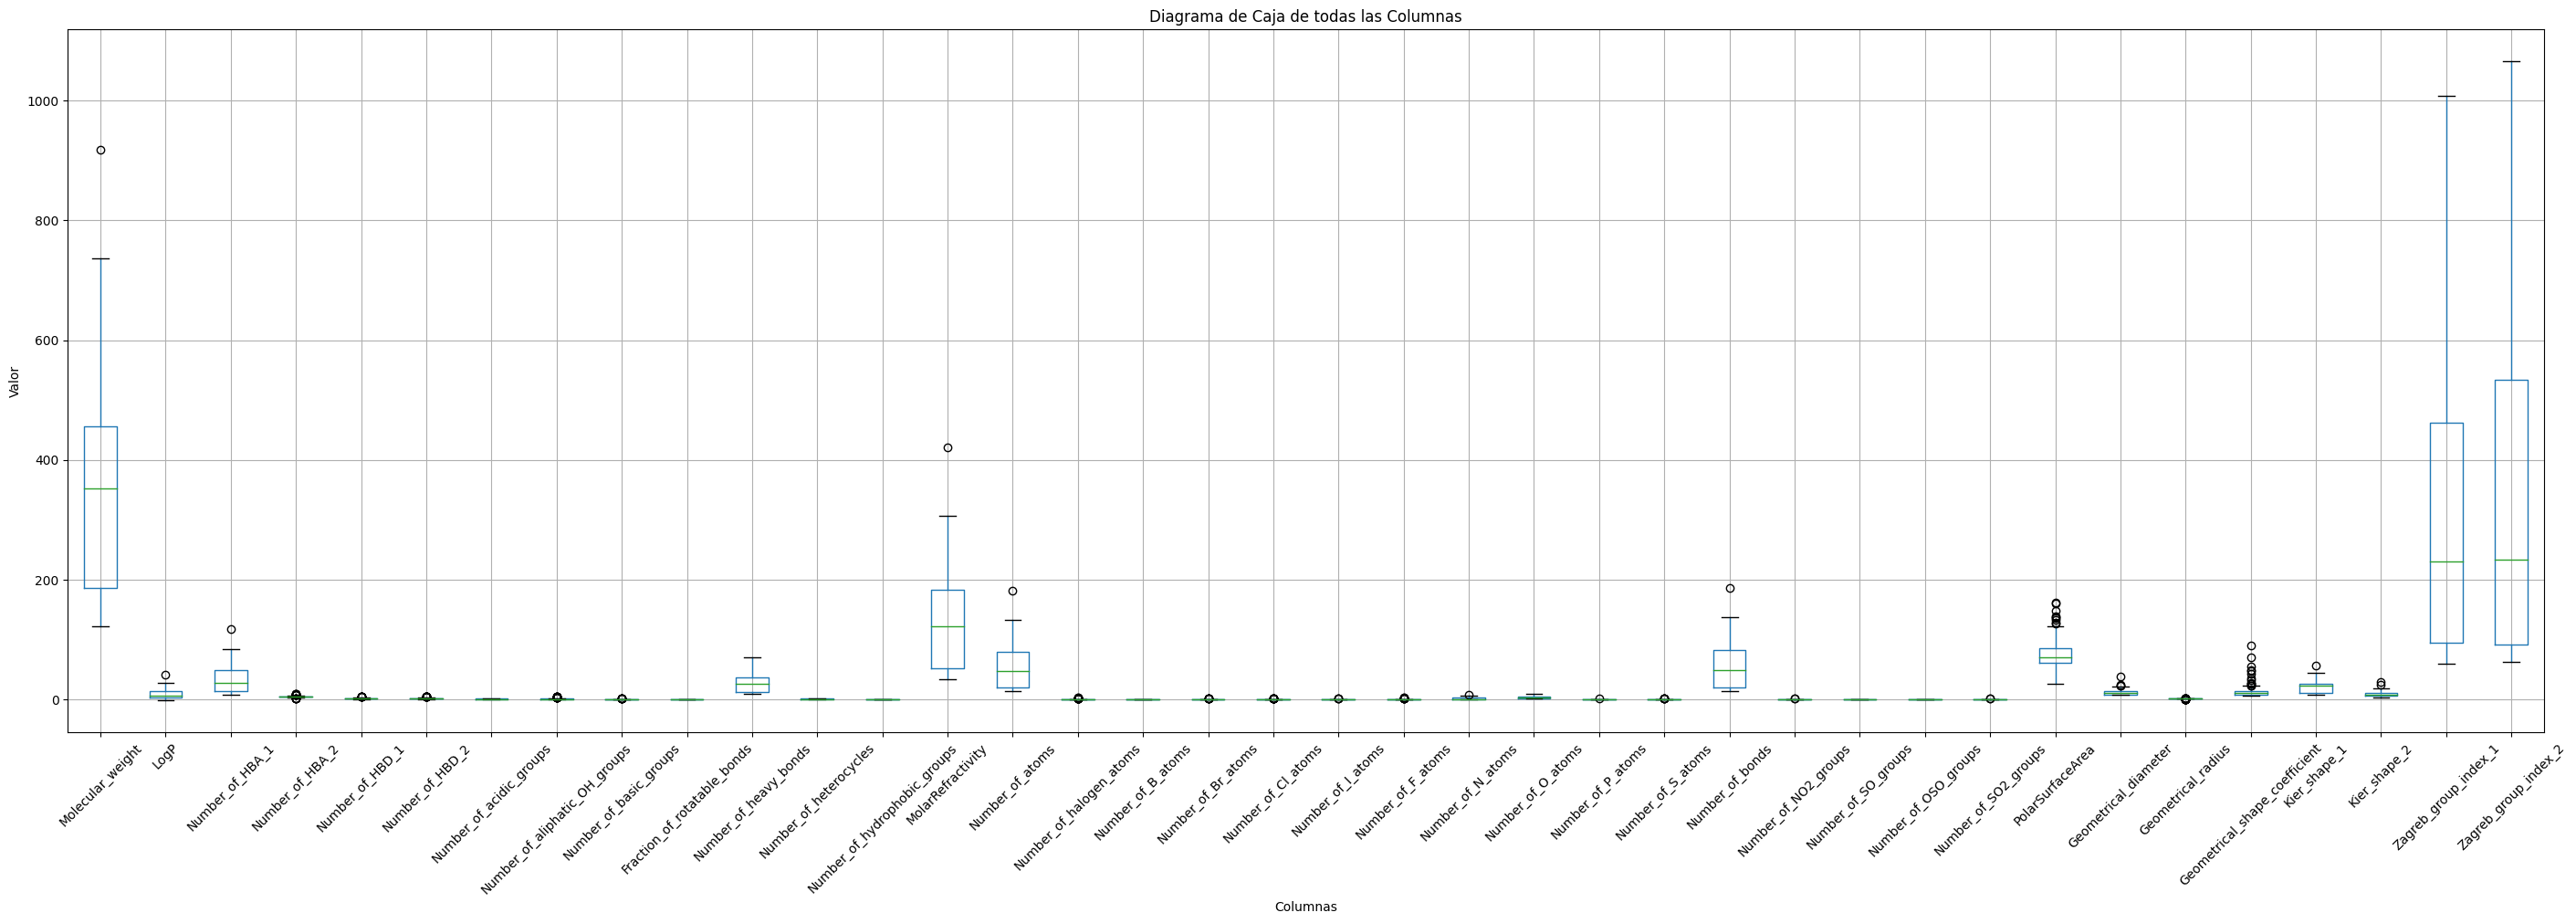

In [13]:
columnas_a_eliminar = ['cid']

# Eliminar las columnas
data = df.drop(columnas_a_eliminar, axis=1)
data

# Trazar diagrama de caja (box plot) de todas las columnas
plt.figure(figsize=(35, 10))
data.boxplot()
plt.title('Diagrama de Caja de todas las Columnas')
plt.ylabel('Valor')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rotar los nombres de las columnas si es necesario
plt.grid(True)
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,300.0,7.927830e+00,6.127177e+00,-1.765100,2.399200e+00,6.627100e+00,1.357108e+01,4.037570e+01
Number_of_HBA_1,300.0,3.013333e+01,1.827280e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [16]:
columnas_a_eliminar = ['Number_of_hydrophobic_groups','Number_of_B_atoms','Number_of_SO_groups','Number_of_OSO_groups']

# Elimino las columnas que tienen valores cero
data1 = data.drop(columnas_a_eliminar, axis=1)
data1

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,123.114998,1.0732,9,4,1,0,0,0,0,0.111111,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,165.155998,1.5166,13,6,2,0,0,0,2,0.166667,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,265.053997,-1.7651,11,3,1,0,1,0,0,0.100000,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,138.149998,1.2309,11,3,1,0,0,0,0,0.100000,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,157.559997,1.6036,8,4,1,0,0,0,0,0.100000,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,396.438991,8.6718,30,6,0,0,0,0,0,0.333333,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,356.373991,5.9132,26,6,2,2,0,0,0,0.222222,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,410.465990,8.5972,32,6,1,1,0,0,0,0.354839,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,425.412990,6.8134,28,8,1,2,1,0,0,0.343750,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [17]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
#Antes de continuar me aseguro que no haya valores NaN
X = data1.dropna()
X = scaler.fit_transform(X)

dfx = pd.DataFrame(data=X,columns=data1.columns[:])
dfx

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,-1.483862,-1.123561,-1.159625,-0.371153,-0.499191,-1.284633,-0.621259,-0.60019,-0.152091,-0.539022,...,-0.082061,-0.082061,-0.281295,-1.229381,0.366441,-0.755485,-1.536101,-1.386096,-1.165728,-1.107237
1,-1.189587,-1.051087,-0.940558,1.285185,0.657848,-1.284633,-0.621259,-0.60019,6.844095,-0.127017,...,-0.082061,-0.082061,1.436146,-0.639626,0.341382,-0.494404,-1.168896,-0.923879,-1.041148,-1.005933
2,-0.490328,-1.587486,-1.050092,-1.199322,-0.499191,-1.284633,1.293756,-0.60019,-0.152091,-0.621423,...,-0.082061,-0.082061,-0.684477,-1.229845,-4.918280,3.667644,-1.055645,-0.950782,-1.046810,-1.020405
3,-1.378621,-1.097785,-1.050092,-1.199322,-0.499191,-1.284633,-0.621259,-0.60019,-0.152091,-0.621423,...,-0.082061,-0.082061,-0.684477,-1.219428,0.360194,-0.750310,-1.413928,-1.338840,-1.046810,-1.020405
4,-1.242757,-1.036866,-1.214392,-0.371153,-0.499191,-1.284633,-0.621259,-0.60019,-0.152091,-0.621423,...,-0.082061,-0.082061,-0.281295,-1.059691,0.367379,-0.681767,-1.413928,-1.338840,-1.160065,-1.092765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.429331,0.118443,-0.009525,1.285185,-1.656230,-1.284633,-0.621259,-0.60019,-0.152091,1.108999,...,-0.082061,-0.082061,-0.183296,1.362350,0.833441,0.236291,0.706391,1.467119,-0.050169,-0.214803
295,0.148887,-0.332455,-0.228591,1.285185,0.657848,0.430123,-0.621259,-0.60019,-0.152091,0.284989,...,-0.082061,-0.082061,0.801167,-0.031111,0.126854,-0.179915,0.339286,0.500818,-0.242702,-0.335403
296,0.527517,0.106249,0.100009,1.285185,-0.499191,-0.427255,-0.621259,-0.60019,-0.152091,1.268484,...,-0.082061,-0.082061,0.308935,1.370234,0.124735,0.454857,0.828909,1.688494,0.040435,-0.099028
297,0.632142,-0.185316,-0.119058,2.941524,-0.499191,0.430123,1.293756,-0.60019,-0.152091,1.186250,...,-0.082061,-0.082061,2.104685,1.221125,0.131632,0.385105,0.951490,1.714481,-0.061495,-0.152092


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)


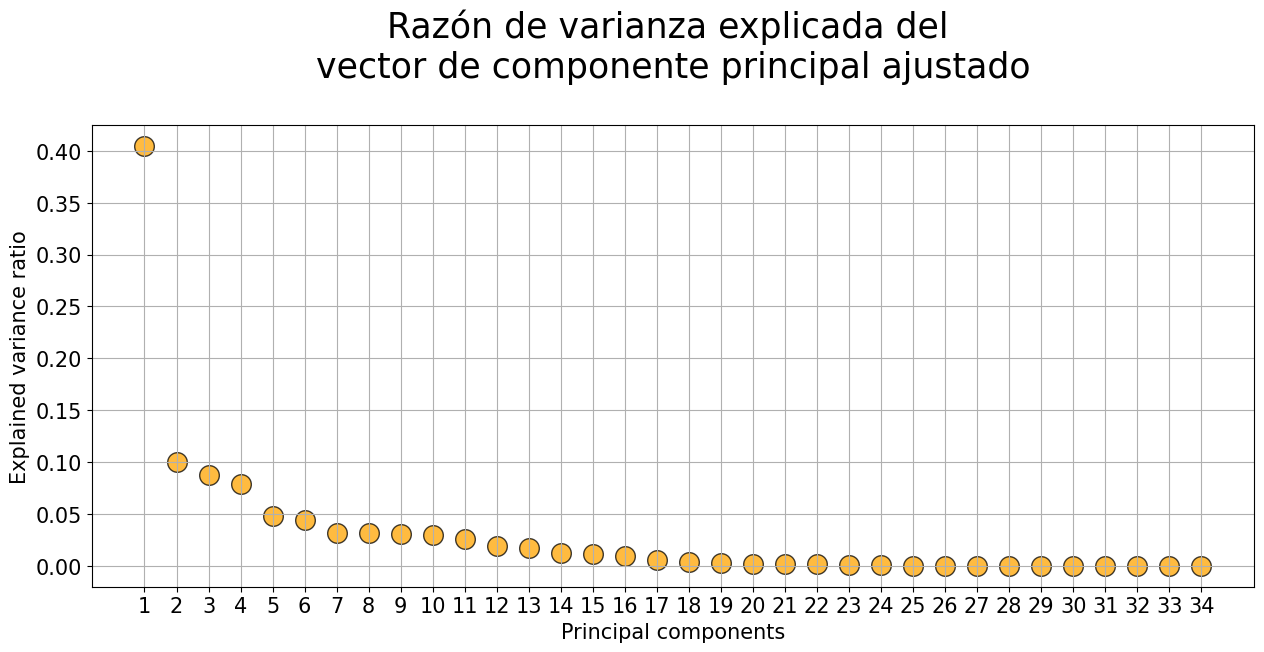

In [35]:
plt.figure(figsize=(15,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Razón de varianza explicada del \nvector de componente principal ajustado\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [36]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-4.967457,-0.712252,-0.378198,-1.440044,0.254377,-0.659068,-0.119147,-0.092119,0.028646,-0.364506,...,-0.002029,-0.007860,-0.029580,0.012075,0.005721,0.002860,0.002603,0.002590,0.000298,2.271166e-16
1,-4.763866,2.459715,0.681705,-0.093990,3.073468,-0.476959,0.748923,-1.981233,0.608063,-2.564244,...,0.003735,-0.038945,-0.073320,0.017628,-0.025199,0.010005,-0.004133,0.004565,0.000397,9.434045e-16
2,-4.541811,-1.554577,5.347619,1.810981,-0.401206,-1.063811,0.765736,7.883401,-5.223531,2.357035,...,0.065452,0.308455,-0.060008,-0.020008,-0.095714,0.002751,0.009635,-0.002695,0.000426,-2.665759e-15
3,-4.687530,-1.365522,-0.239711,-1.518173,0.316921,-0.715286,-0.173702,-0.123576,-0.018855,-0.396389,...,-0.148723,0.071283,0.005142,0.006273,-0.035620,-0.010607,0.004114,0.004080,0.000310,-1.989557e-16
4,-5.289474,-0.705932,1.982650,0.096557,-0.025575,0.070663,-0.003704,-0.461094,0.367354,-0.304454,...,0.058890,0.030880,-0.000874,0.013746,-0.041055,-0.007956,0.006587,0.002078,0.000283,8.759269e-16
5,-4.680126,0.632554,-0.360911,-1.225237,-0.043889,-0.566490,-0.220382,-0.279718,0.028808,-0.511692,...,0.035520,-0.010820,-0.049477,0.005671,0.015622,-0.001244,-0.006038,0.001022,0.000114,4.073134e-18
6,-4.098870,1.167213,-0.078542,-1.721318,-0.488915,-0.609919,-0.260635,0.261413,0.099562,-0.389346,...,-0.094233,0.019465,-0.066770,0.025584,-0.001999,0.004085,-0.007428,0.006822,0.000659,1.197725e-16
7,-4.599340,-0.004313,-0.397669,-1.589394,-0.024158,-0.606575,-0.144784,-0.095356,-0.062648,-0.277166,...,-0.143618,0.007819,0.043920,0.018063,-0.018874,0.007290,-0.013871,0.007442,-0.000886,-1.062381e-15
8,-5.327066,-0.703489,1.970966,0.014551,-0.032907,0.076533,-0.015949,-0.467541,0.365035,-0.311962,...,0.061336,0.026077,0.000316,0.012199,-0.043219,-0.006960,0.006645,0.002205,0.000338,9.099474e-16
9,-4.698995,-0.774111,-0.326079,-1.456052,0.329084,-0.621468,-0.071640,-0.112670,0.037098,-0.362189,...,-0.008361,-0.008892,0.014766,-0.000939,-0.015612,-0.001947,0.002349,-0.000998,0.000276,8.328870e-17


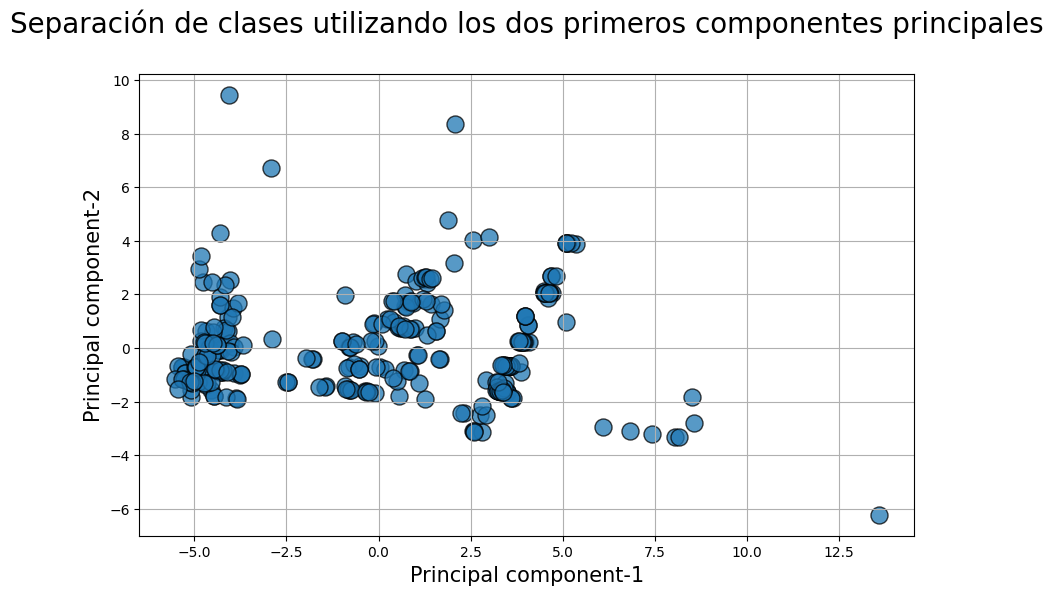

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=None,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separación de clases utilizando los dos primeros componentes principales\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [57]:
from itertools import combinations
df1=data1

In [58]:
lst_vars=list(combinations(df1.columns,2))
print(lst_vars)

[('Molecular_weight', 'LogP'), ('Molecular_weight', 'Number_of_HBA_1'), ('Molecular_weight', 'Number_of_HBA_2'), ('Molecular_weight', 'Number_of_HBD_1'), ('Molecular_weight', 'Number_of_HBD_2'), ('Molecular_weight', 'Number_of_acidic_groups'), ('Molecular_weight', 'Number_of_aliphatic_OH_groups'), ('Molecular_weight', 'Number_of_basic_groups'), ('Molecular_weight', 'Fraction_of_rotatable_bonds'), ('Molecular_weight', 'Number_of_heavy_bonds'), ('Molecular_weight', 'Number_of_heterocycles'), ('Molecular_weight', 'MolarRefractivity'), ('Molecular_weight', 'Number_of_atoms'), ('Molecular_weight', 'Number_of_halogen_atoms'), ('Molecular_weight', 'Number_of_Br_atoms'), ('Molecular_weight', 'Number_of_Cl_atoms'), ('Molecular_weight', 'Number_of_I_atoms'), ('Molecular_weight', 'Number_of_F_atoms'), ('Molecular_weight', 'Number_of_N_atoms'), ('Molecular_weight', 'Number_of_O_atoms'), ('Molecular_weight', 'Number_of_P_atoms'), ('Molecular_weight', 'Number_of_S_atoms'), ('Molecular_weight', 'Numb

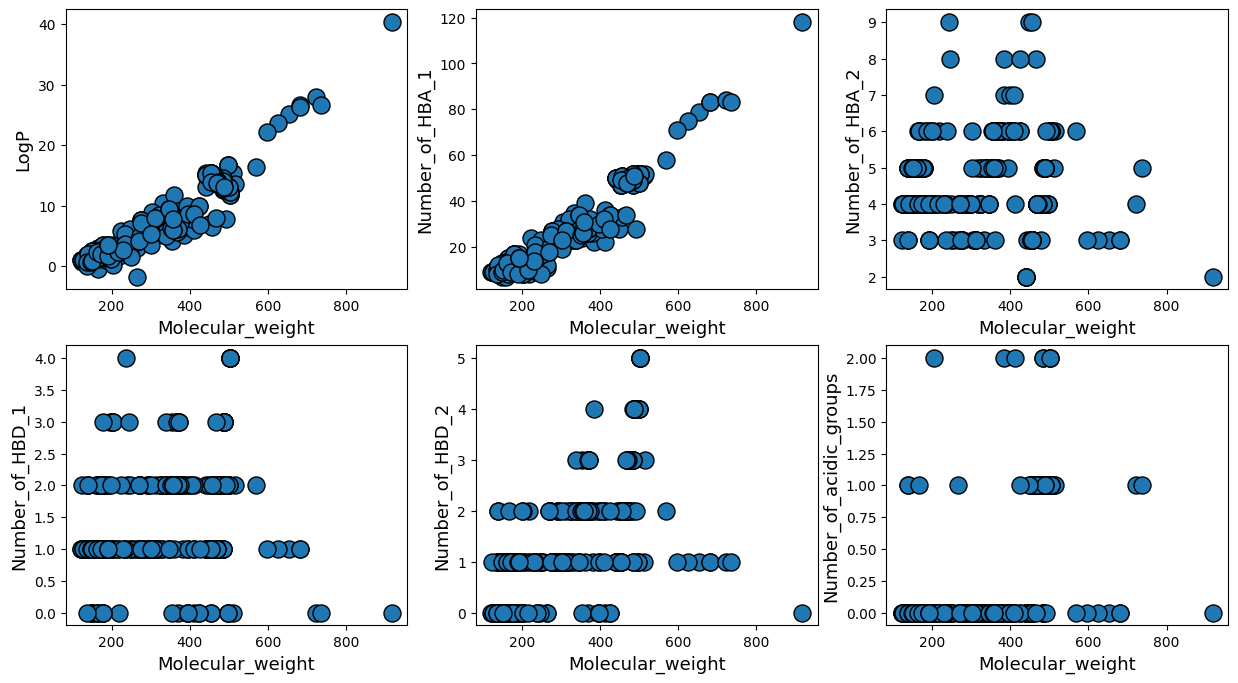

In [59]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=None,edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [47]:
scaler = MinMaxScaler()

In [60]:
X_scaled=scaler.fit_transform(X)

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [63]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)

    print("Score para el número de grupos {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))

    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score para el número de grupos {}: {}".format(i,silhouette))

    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score para el número de grupos {}: {}".format(i,db))

    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score para el número de grupos {}: {}".format(i,v_measure))
    print("-"*100)

Score para el número de grupos 2: -185.1750501388825
Silhouette score para el número de grupos 2: 0.37112614472320593
Davies Bouldin score para el número de grupos 2: 1.112339793751547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'y' is not defined

ValueError: x and y must be the same size

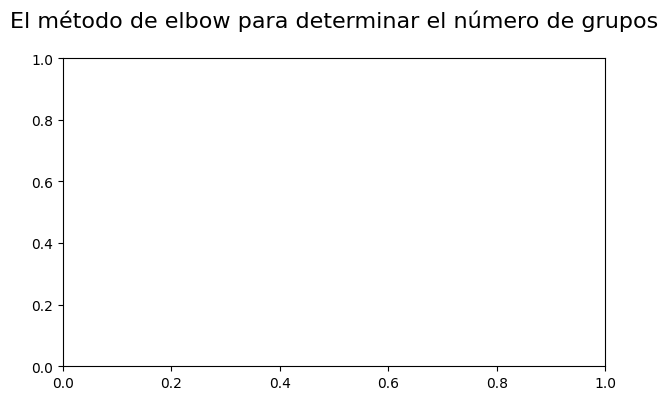

In [64]:
plt.figure(figsize=(7,4))
plt.title("El método de elbow para determinar el número de grupos\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Número de grupos",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()